In this notebook, we will perform an initial exploratory data analysis (EDA) on a dataset loaded from a CSV file. We will explore the structure of the DataFrame, check for missing values, and get a general overview of the data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset and perform initial exploration

In [2]:
# Load the dataset
df = pd.read_csv('datasets/dataset_house_apartment.csv')
# Remove duplicate rows
df = df.drop_duplicates()
# Set seaborn style and context for better visualization
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.2)
# Show the number of rows and columns
print(f'Row/columns: {df.shape} \n'+'='*50)
# Display column titles
print(f'Column titles: {df.columns} \n'+'='*50)
# Display data types of each column
print(f'Data types:\n{df.dtypes}')

Row/columns: (50842, 20) 
Column titles: Index(['locality', 'type_of_property', 'subtype_of_property', 'price',
       'type_of_sale', 'number_of_rooms', 'house_area',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_the_land',
       'surface_of_the_plot_of_land', 'number_of_facades', 'swimming_pool',
       'state_of_the_building', 'construction_year'],
      dtype='object') 
Data types:
locality                         int64
type_of_property                object
subtype_of_property             object
price                           object
type_of_sale                    object
number_of_rooms                float64
house_area                     float64
fully_equipped_kitchen           int64
furnished                      float64
open_fire                        int64
terrace                          int64
terrace_area                   float64
garden                           int64
garden_area        

Fix the data type of the column with incorrect type

In [3]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['number_of_rooms'] = pd.to_numeric(df['number_of_rooms'], errors='coerce', downcast='integer')
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce', downcast='integer')
print(df.dtypes[['price', 'number_of_rooms', 'construction_year']])

price                float64
number_of_rooms      float64
construction_year    float64
dtype: object


Get summary information about the DataFrame

In [4]:
# Display summary information about the DataFrame
print(f'{df.info()}\n')

<class 'pandas.core.frame.DataFrame'>
Index: 50842 entries, 0 to 52076
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     50842 non-null  int64  
 1   type_of_property             50842 non-null  object 
 2   subtype_of_property          50842 non-null  object 
 3   price                        50772 non-null  float64
 4   type_of_sale                 50842 non-null  object 
 5   number_of_rooms              50840 non-null  float64
 6   house_area                   42412 non-null  float64
 7   fully_equipped_kitchen       50842 non-null  int64  
 8   furnished                    0 non-null      float64
 9   open_fire                    50842 non-null  int64  
 10  terrace                      50842 non-null  int64  
 11  terrace_area                 17096 non-null  float64
 12  garden                       50842 non-null  int64  
 13  garden_area          

Overview of values in the DataFrame

In [5]:
# General overview of the DataFrame
# Display the first and last 5 rows of the DataFrame
print(f'First 5 rows:\n{df.head()}\n'+'='*50)
# Display the last 5 rows of the DataFrame
print(f'Last 5 rows:\n{df.tail()}')

First 5 rows:
   locality type_of_property   subtype_of_property     price type_of_sale  \
0      1050            house                 house  340000.0     for sale   
1      1880            house                 villa  525000.0     for sale   
2      4900            house  exceptional property  550000.0     for sale   
3      7912            house                 villa  550000.0     for sale   
4      6032            house                 house  550000.0     for sale   

   number_of_rooms  house_area  fully_equipped_kitchen  furnished  open_fire  \
0              6.0       203.0                       1        NaN          0   
1              6.0       250.0                       1        NaN          0   
2             11.0       475.0                       1        NaN          0   
3              4.0       325.0                       1        NaN          0   
4              5.0       400.0                       1        NaN          0   

   terrace  terrace_area  garden  garden_a

Missing values analysis

In [6]:
# General overview of missing values in the DataFrame
na_data = pd.DataFrame({'numb_na': df.isna().sum(),
                        'perc_na': (df.isna().sum() / df.shape[0] * 100).round(2)})
print(f'Missing values overview:\n{na_data.sort_values('numb_na', ascending=False)}\n'+'='*50)
# Cleaning the table by filling missing values
df_clean = df.copy()
#df_clean = df_clean.dropna(df_clean)
print(f'Cleaned DataFrame shape: {df_clean.shape}')

Missing values overview:
                             numb_na  perc_na
furnished                      50842   100.00
surface_of_the_plot_of_land    50842   100.00
garden_area                    42492    83.58
terrace_area                   33746    66.37
surface_of_the_land            21840    42.96
construction_year              20959    41.22
state_of_the_building          13172    25.91
number_of_facades              13106    25.78
house_area                      8430    16.58
price                             70     0.14
number_of_rooms                    2     0.00
swimming_pool                      0     0.00
locality                           0     0.00
garden                             0     0.00
type_of_property                   0     0.00
open_fire                          0     0.00
fully_equipped_kitchen             0     0.00
type_of_sale                       0     0.00
subtype_of_property                0     0.00
terrace                            0     0.00
Cleaned D

**Statistical summary of a chosen column**

In [7]:
print(df.describe())

           locality          price  number_of_rooms    house_area  \
count  50842.000000   50772.000000     50840.000000  42412.000000   
mean    5388.526081  306427.439396         2.828285    154.724158   
std     2958.804834  168387.952272         2.221249    185.137627   
min     1000.000000    1000.000000         0.000000      1.000000   
25%     2600.000000  195000.000000         2.000000     91.000000   
50%     5030.000000  268000.000000         3.000000    130.000000   
75%     8420.000000  373365.500000         3.000000    186.000000   
max     9992.000000  950000.000000       204.000000  31700.000000   

       fully_equipped_kitchen  furnished     open_fire       terrace  \
count            50842.000000        0.0  50842.000000  50842.000000   
mean                 0.654518        NaN      0.047303      0.562960   
std                  0.475530        NaN      0.212289      0.496025   
min                  0.000000        NaN      0.000000      0.000000   
25%               

**Data Visualization: Scatter Plot**

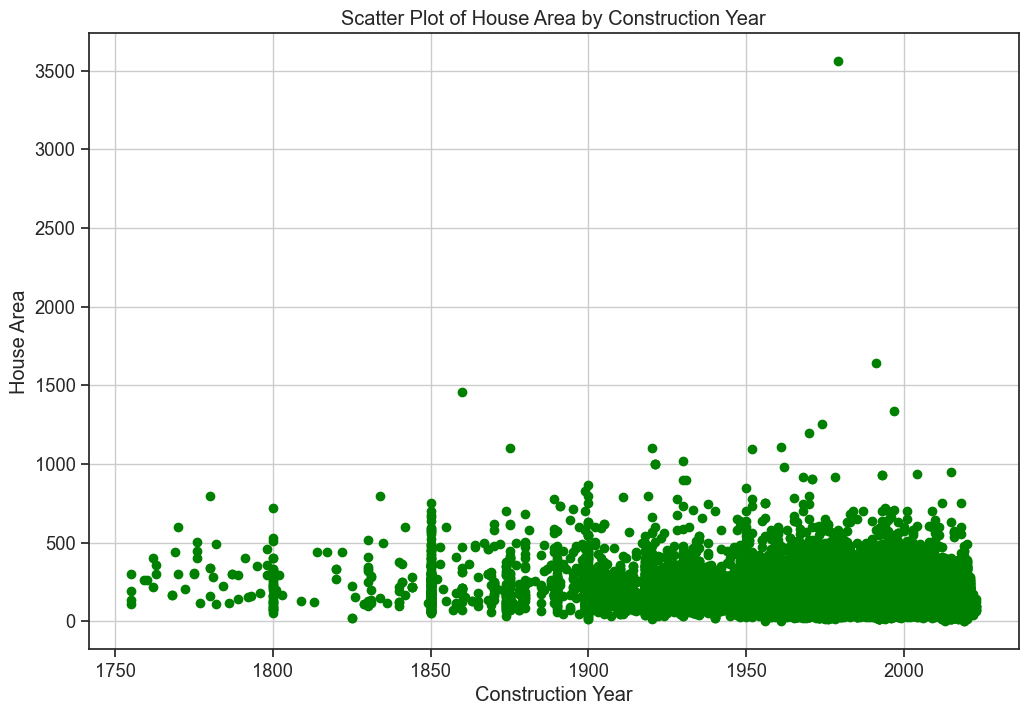

In [8]:
# Import cleaned DataFrame for visualization
df_scatter = df_clean[['construction_year', 'house_area', 'type_of_property']].dropna()
# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_scatter['construction_year'], df_scatter['house_area'], marker='o', color='green')
plt.title('Scatter Plot of House Area by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('House Area')
plt.grid(True)

**Data Visualization: Line Chart with Outlier Removal and Binning**

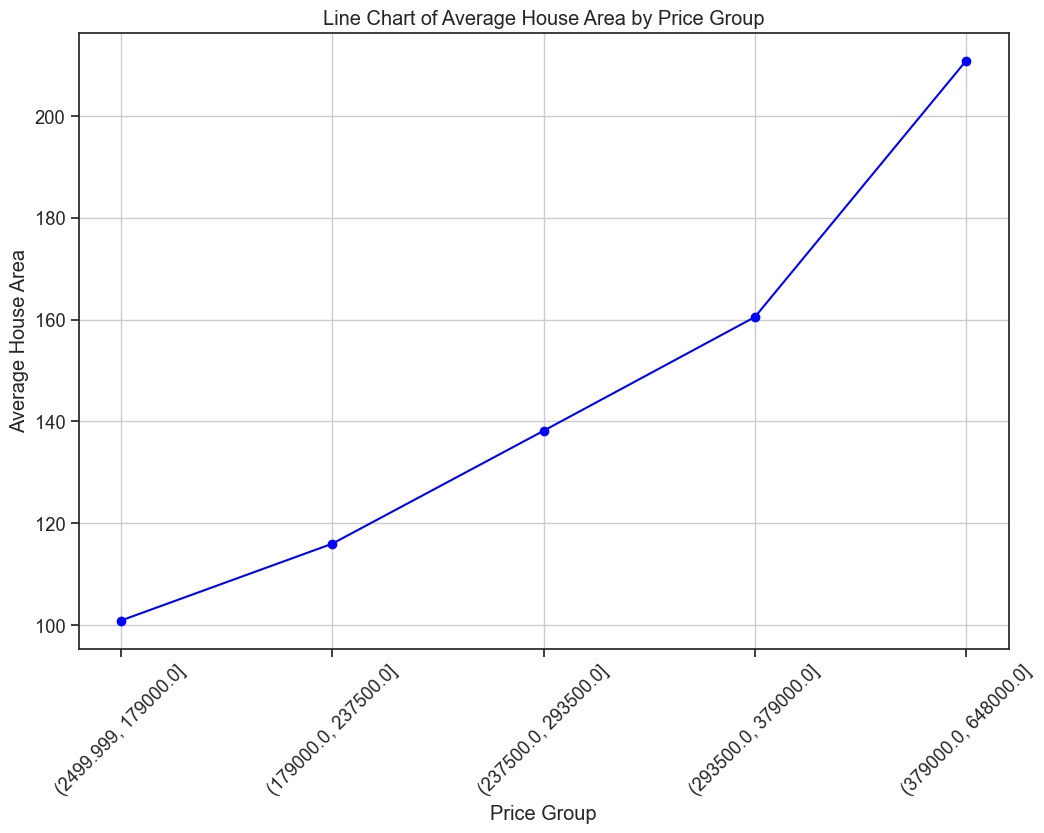

In [9]:
# Import cleaned DataFrame for visualization
df_line_chart = df_clean[['price', 'house_area']].dropna()
# Remove outliers using IQR method
iqr_price = df_line_chart['price'].quantile(0.75) - df_line_chart['price'].quantile(0.25)
lower_bound_price = df_line_chart['price'].quantile(0.25) - 1.5 * iqr_price
upper_bound_price = df_line_chart['price'].quantile(0.75) + 1.5 * iqr_price
price_bounded = df_line_chart[((df_line_chart['price'] > lower_bound_price) & (df_line_chart['price'] < upper_bound_price))]
# Create bins for price
bins = pd.qcut(price_bounded['price'], q=5)
# Combine binned data with original DataFrame
price_bounded = pd.concat([price_bounded, bins.rename('price_group')], axis=1)
# Calculate average house area for each price group
line_chart_data = price_bounded.groupby('price_group', observed=True)['house_area'].mean().reset_index()
# Create line chart
plt.figure(figsize=(12, 8))
plt.plot(line_chart_data['price_group'].astype('string'), line_chart_data['house_area'], marker='o', color='blue')
plt.title('Line Chart of Average House Area by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Average House Area')
plt.xticks(rotation=45)
plt.grid(True)

**Data Visualization: Bar Chart**

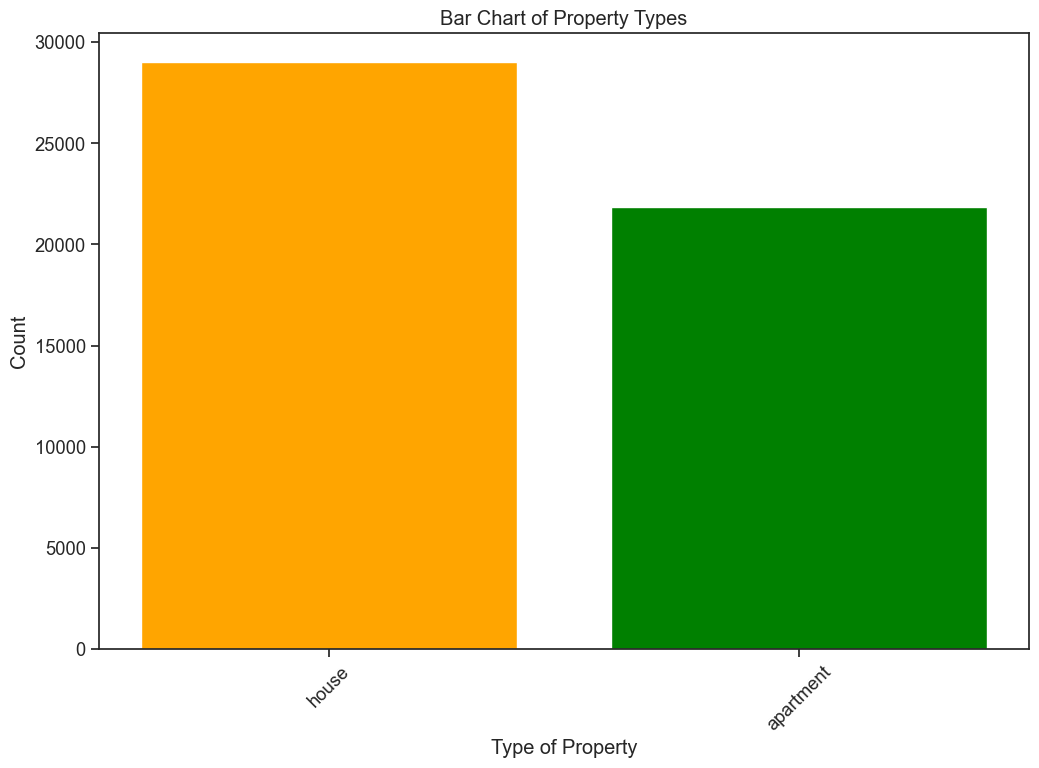

In [10]:
# Import cleaned DataFrame for visualization
df_bar = df_clean['type_of_property'].dropna()
# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_bar.value_counts().index, df_bar.value_counts().values, color=['orange', 'green'])
plt.title('Bar Chart of Property Types')
plt.xlabel('Type of Property')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)


**Data Visualization: Line Chart with Seaborn**

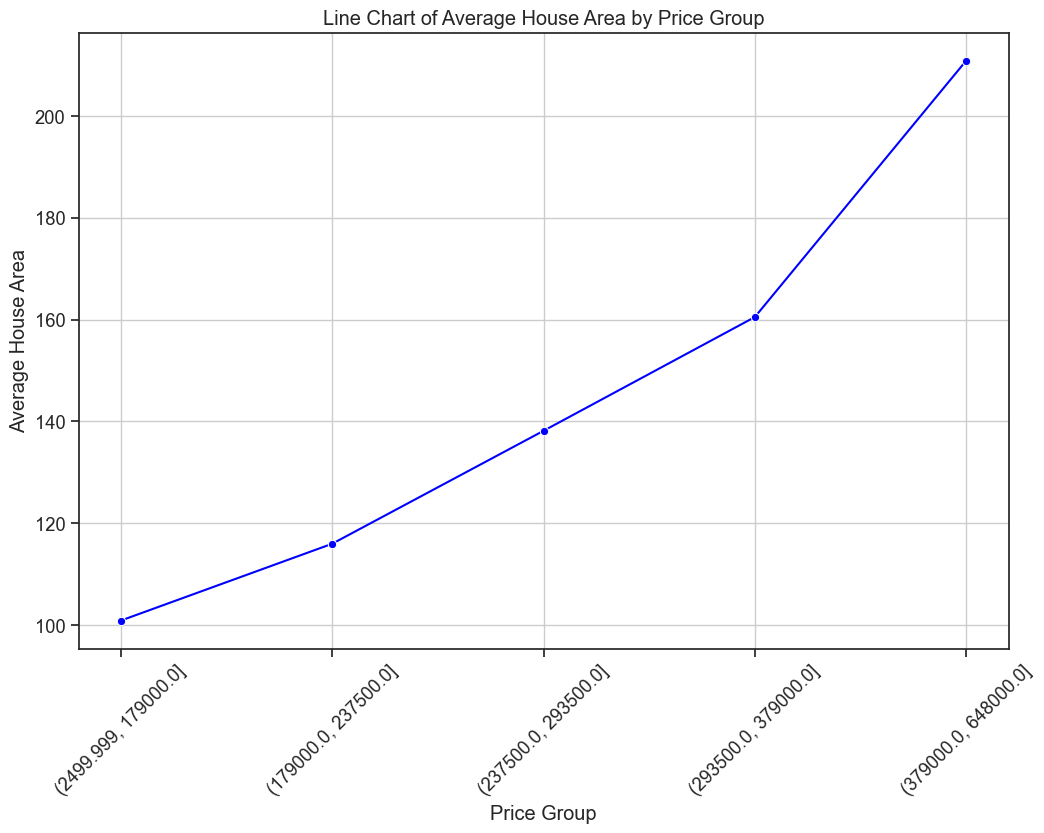

In [11]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=line_chart_data['price_group'].astype('string'), y=line_chart_data['house_area'], marker='o', color='blue')
plt.title('Line Chart of Average House Area by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Average House Area')
plt.xticks(rotation=45)
plt.grid(True)


**Data Visualization: Scatter Plot with Seaborn**

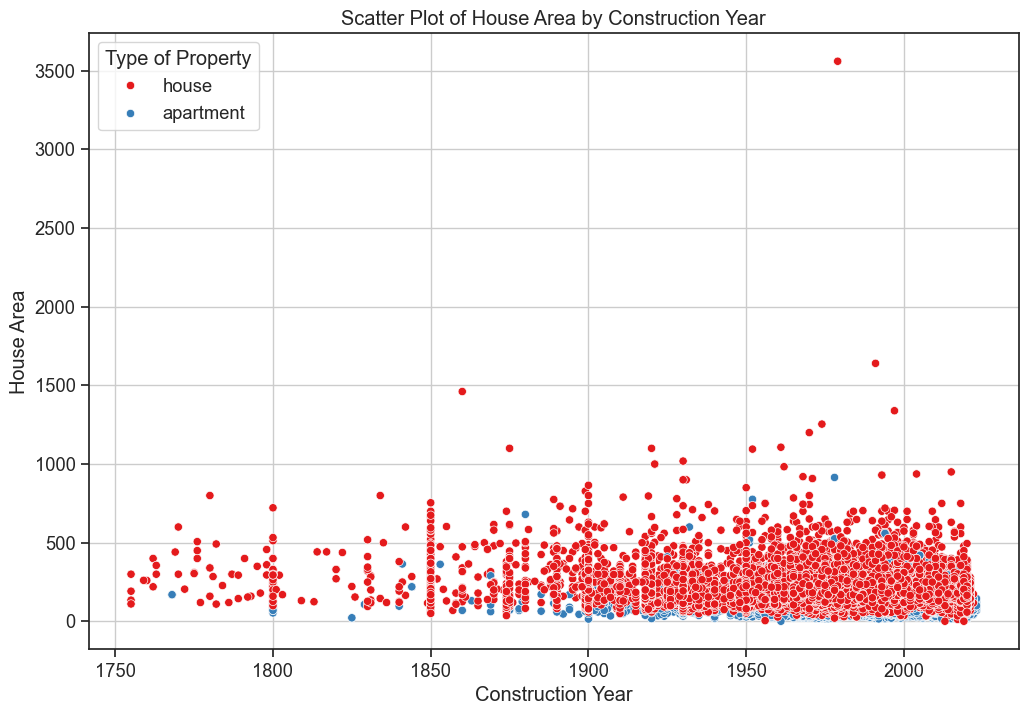

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df_scatter, x='construction_year', y='house_area', hue=df_scatter['type_of_property'], palette='Set1')
plt.title('Scatter Plot of House Area by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('House Area')
plt.legend(loc='upper left', title='Type of Property')
plt.grid(True)

**Data Visualization: Count Plot with Seaborn**

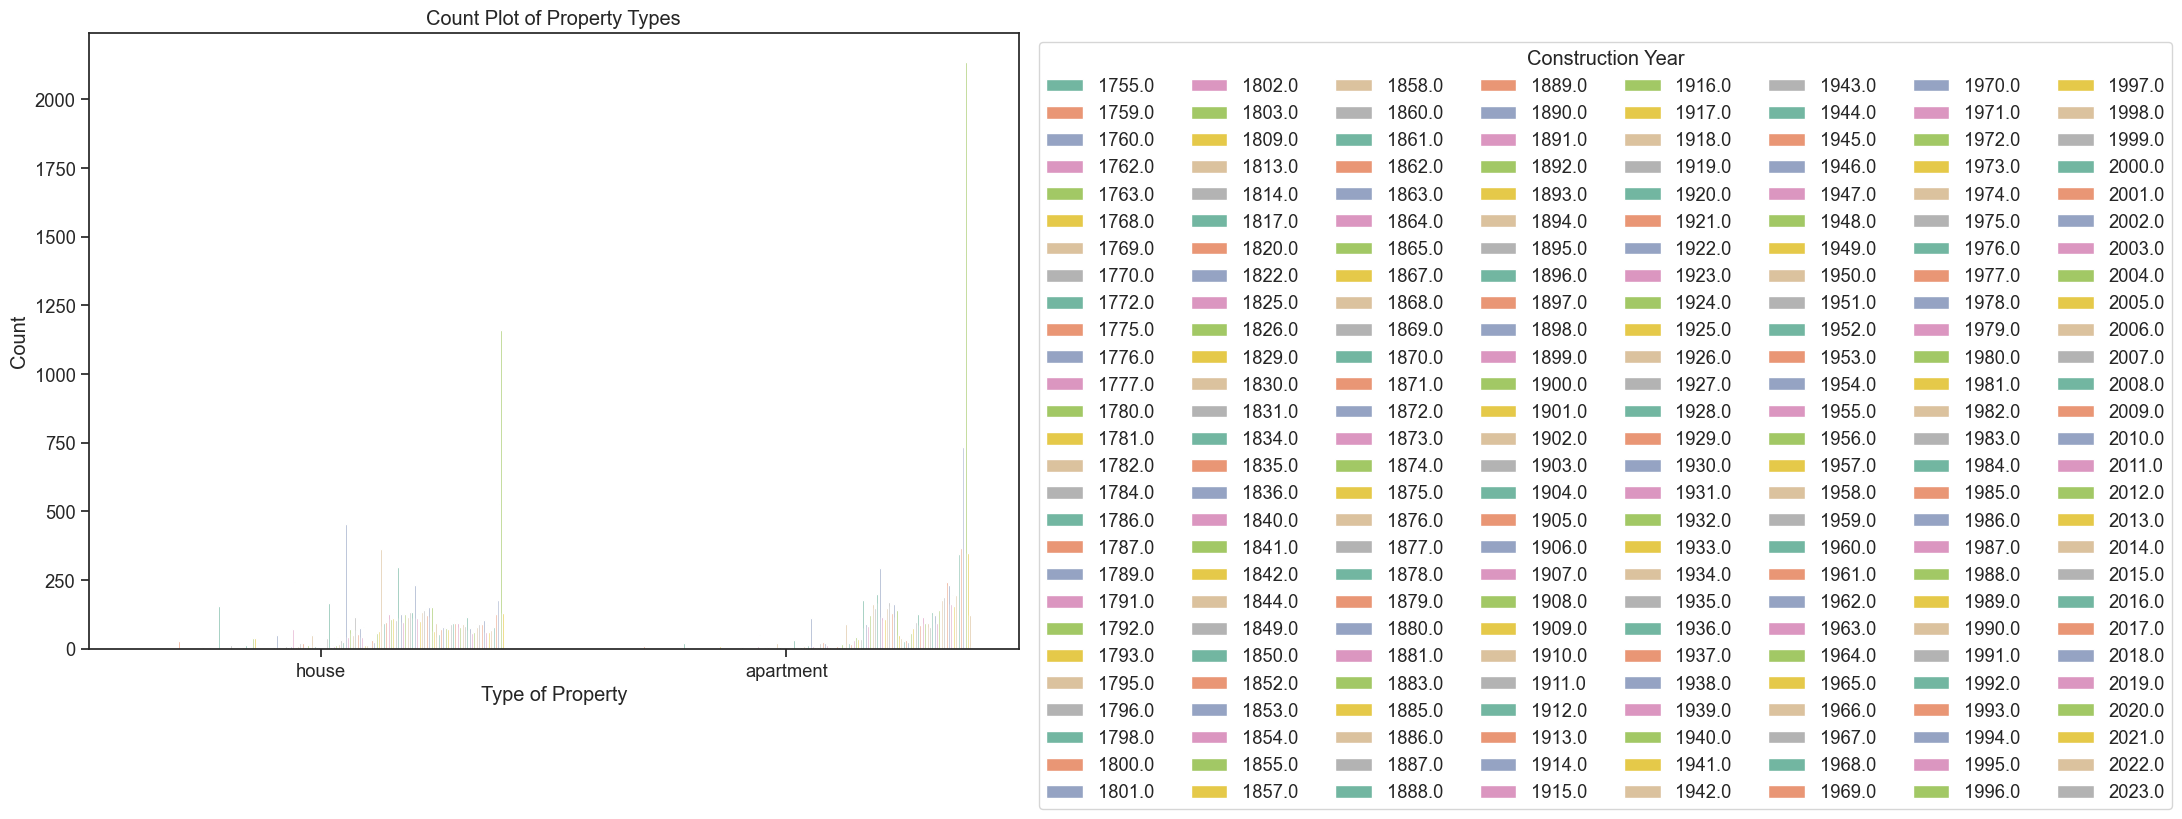

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_scatter, x='type_of_property', hue='construction_year', palette='Set2')
plt.title('Count Plot of Property Types')
plt.xlabel('Type of Property')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Construction Year', bbox_to_anchor=(2.25, 1), ncol=8)
plt.grid(False)

**Data Visualization: Box Plot with Seaborn and Outlier Removal**

Text(0, 0.5, 'Type of Property')

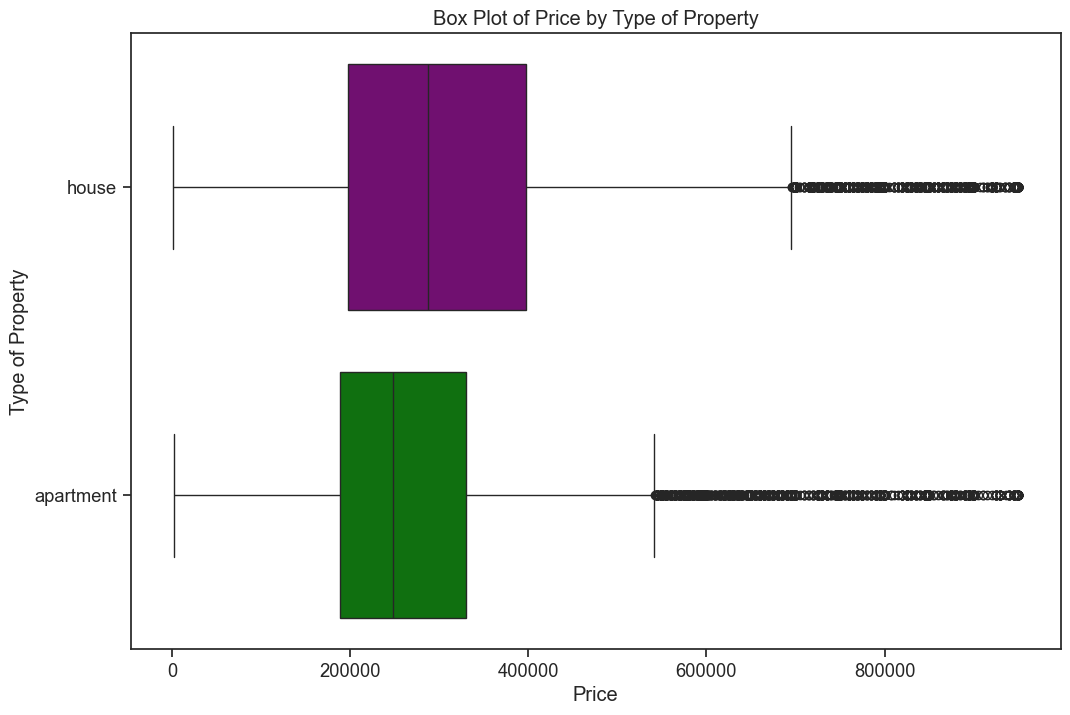

In [14]:
df_boxplot = df_clean[['price', 'type_of_property']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_boxplot, x='price', y='type_of_property', hue='type_of_property', palette=['purple', 'green'], legend=False)
plt.title('Box Plot of Price by Type of Property')
plt.xlabel('Price')
plt.ylabel('Type of Property')

**Data Visualization: KDE Plot with Seaborn for Top 5 Localities**

Text(0, 0.5, 'Density')

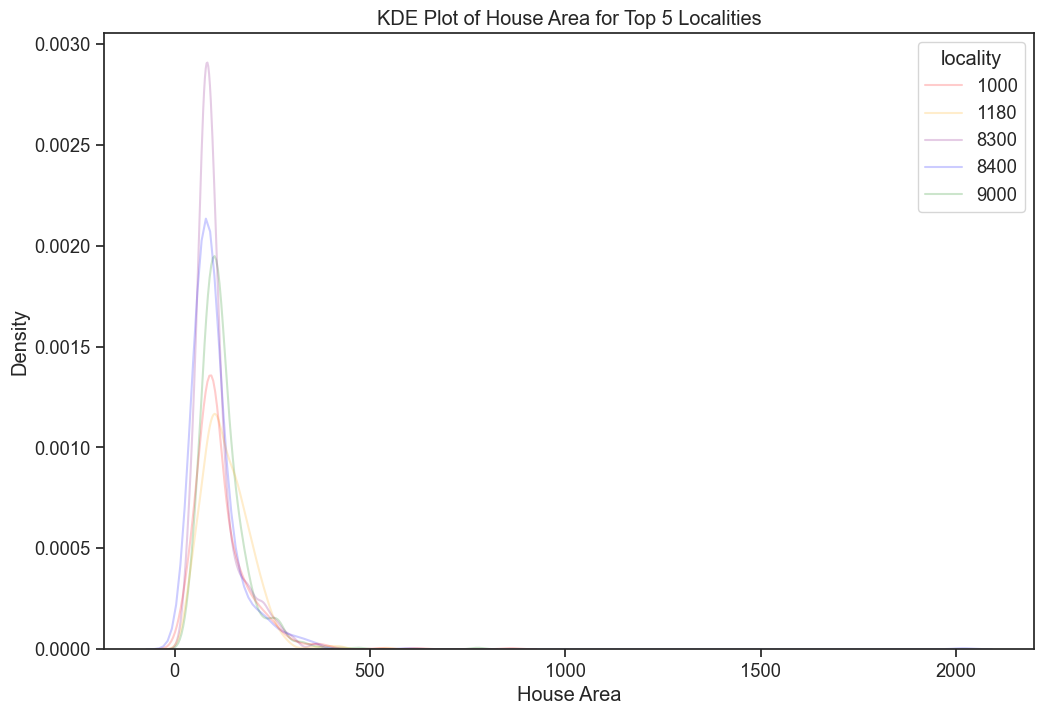

In [15]:
df_kplot = df_clean[['locality', 'house_area']].dropna()
# Select top 5 localities with the most entries
top_5_localities = df_kplot['locality'].value_counts().head().index
# Filter DataFrame for top 5 localities
df_kplot_top5 = df_kplot[df_kplot['locality'].isin(top_5_localities)]
# Create KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_kplot_top5, x='house_area', hue='locality', fill=False, alpha=0.2, palette=['red', 'orange', 'purple', 'blue', 'green'])
plt.title('KDE Plot of House Area for Top 5 Localities')
plt.xlabel('House Area')
plt.ylabel('Density')